# <a name="contents">Задачи исследования — Сборный проект</a>

## [1. Откройте файл с данными и изучите общую информацию](#stage_1)
Путь к файлу:
- /datasets/games.csv
- /datasets/rating.csv — данные о рейтинге ESRB


## [2. Подготовьте данные](#stage_2)
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков
    

## [3. Проведите исследовательский анализ данных](#stage_3)
- Постройте распределение по годам релиза и опишите полученный результат
- Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Постройте график продаж по каждому году; сделайте вывод
- Постройте ящик с усами по глобальным продажам, опишите полученный результат
- Узнайте, на какой платформе было выпущено больше всего игр
- Определите, игр какого жанра больше всего
- Найдите игры с наибольшей и наименьшей оценкой от пользователей
- Найдите игры с наибольшей и наименьшей оценкой от критиков
- Оцените корреляцию между оценками критиков и пользовательскими оценками


## [4. Составьте портрет пользователя для каждого региона](#stage_4)
Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


## [5. Проверьте гипотезы](#stage_5)
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


## [6. Напишите общий вывод](#stage_6)
- Общие выводы
- Рекомендации

## Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год релиза
- Genre — жанр игры
- NA_players — продажи игрокам в Северной Америке (в миллионах долларов)
- EU_players — продажи игрокам в Европе (в миллионах долларов)
- RU_players — продажи игрокам в России (в миллионах долларов)
- Other_players — продажи игрокам в других странах
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг ESRB

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc = {'figure.figsize' :(16, 6)}, style = 'whitegrid')
plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [2]:
df=pd.read_csv('C:/Users/serge/analyst/datasets/games.csv')

In [3]:
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [6]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [7]:
# Посчитайте количество продаж во всех регионах и запишите в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales']  + df['other_sales']

In [8]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  total_sales  
0          E        78.77  
1        NaN        33.43  
2          E        31.73  
3          E        29.49  
4        NaN        21.16  
...      ...          ...  
16710    NaN         0.00  
16711    NaN         0.01  
16712    NaN         0.00  
16713    NaN         0.01  
16714    NaN         0.00  

[16715 rows x 12 columns]

In [10]:

df['year_of_release']=df['year_of_release'].fillna(2077)
df['year_of_release']=df['year_of_release'].astype('int')

In [11]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  total_sales  
0          E        78.77  
1        NaN        33.43  
2          E        31.73  
3          E        29.49  
4        NaN        21.16  
...      ...          ...  
16710    NaN         0.00  
16711    NaN         0.01  
16712    NaN         0.00  
16713    NaN         0.01  
16714    NaN         0.00  

[16715 rows x 12 columns]

In [12]:
# Так как это что-то неочевидное и связано с обновлением базы — есть tbd и с 2001 и с 2010 годом, то проставим np.nan
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [13]:
df['user_score'] = df['user_score'].astype('float')

In [14]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  
0          E        78.77  
1        NaN        33.43  
2          E        31.73  
3          E        29.49  
4        NaN        21.16  
...      ...          ...  
16710    NaN         0.00  
16711    NaN         0.01  
16712    NaN         0.00  
16713    NaN         0.01  
16714    NaN         0.00  

[16715 rows x 12 columns]

In [15]:
df.critic_score.dtype

dtype('float64')

<a name="stage_3"></a>
## 3. Проведите исследовательский анализ данных
1. Постройте распределение по годам релиза и опишите полученный результат
2. Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
3. Постройте график продаж по каждому году; сделайте вывод
4. Постройте ящик с усами по глобальным продажам, опишите полученный результат
5. Узнайте, на какой платформе было выпущено больше всего игр
6. Определите, игр какого жанра больше всего
7. Найдите игры с наибольшей и наименьшей оценкой от пользователей
8. Найдите игры с наибольшей и наименьшей оценкой от критиков
9. Оцените корреляцию между оценками критиков и пользовательскими оценками

[Наверх к оглавлению](#contents)

# 1.  Постройте распределение по годам релиза и опишите полученный результат

Text(0.5, 1.0, 'Распределение по годам релиза')

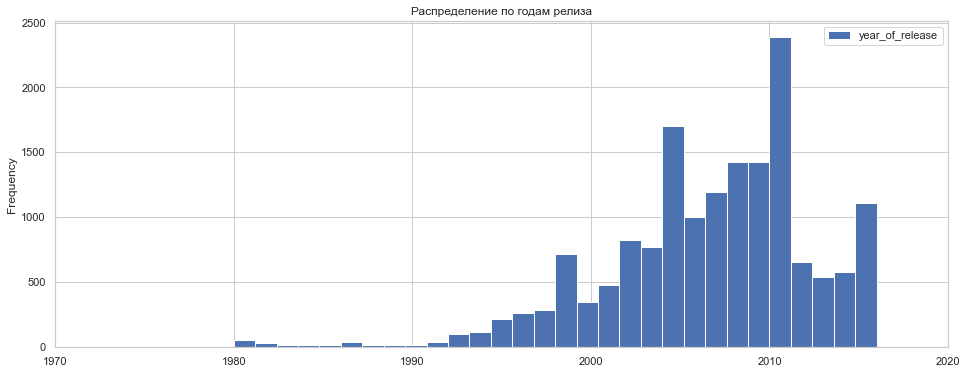

In [16]:
 #1  Постройте распределение по годам релиза и опишите полученный результат
ax = df[df['year_of_release'] != 2077]['year_of_release'].plot(kind='hist', bins=30, grid=True,xlim=(1970,2020)).legend()
plt.title('Распределение по годам релиза')

In [17]:
df.critic_score.fillna(-1,inplace=True)

In [18]:
df.critic_score.unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

# 2  Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод

Text(0.5, 1.0, 'Отзывы и без отзыва — критики')

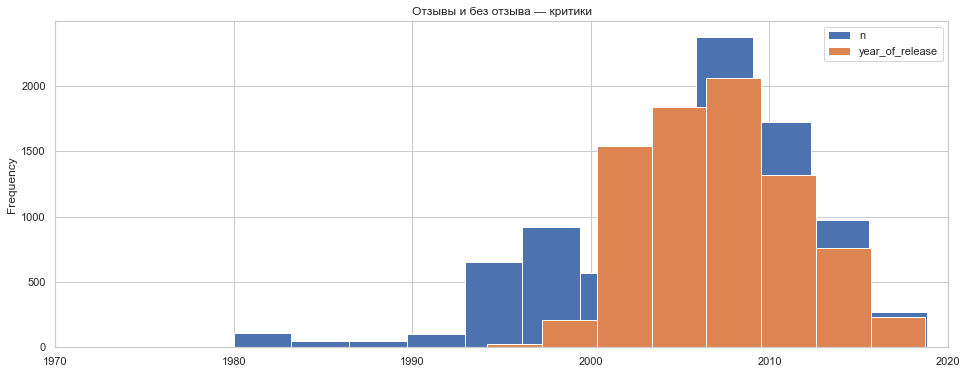

In [19]:


df[df['critic_score']==-1]['year_of_release'].plot(kind='hist', bins=30, grid=True,xlim=(1970,2020),legend =True).legend('n')
plt.title('Распределение по годам релиза')

df[df['critic_score']!=-1]['year_of_release'].plot(kind='hist', bins=30, grid=True,xlim=(1970,2020),legend =True)
plt.title('Отзывы и без отзыва — критики')

# 3) Постройте график продаж по каждому году; сделайте вывод

In [20]:
df.query('year_of_release!=2077')

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77          -1.0         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00          -1.0         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00          -1.0         NaN   
16711      0.00      0.01      0.00         0.00          -1.0         NaN   
16712      0.00      0.00      0.01         0.00          -1.0         NaN   
16713      0.01      0.00      0.00         0.00          -1.0         NaN   
16714      0.00      0.00      0.01         0.00          -1.0         NaN   

      rating  total_sales  
0          E        78.77  
1        NaN        33.43  
2          E        31.73  
3          E        29.49  
4        NaN        21.16  
...      ...          ...  
16710    NaN         0.00  
16711    NaN         0.01  
16712    NaN         0.00  
16713    NaN         0.01  
16714    NaN         0.00  

[16446 rows x 12 columns]

<AxesSubplot:xlabel='year_of_release'>

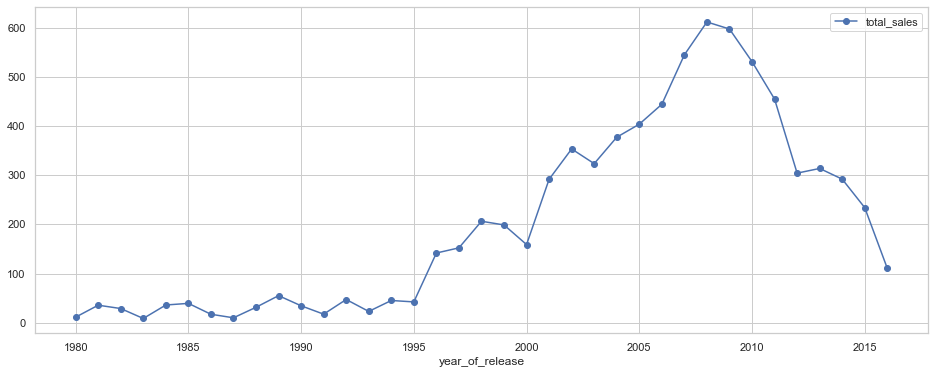

In [21]:

df[df['year_of_release'] != 2077].groupby('year_of_release').agg({'total_sales':'sum'}).plot(grid=True, style='o-')


Максимальное число игр выходило c 2005 по 2011гг. ,далее видим тенденцию уменбшения рынка.

# 4 Постройте ящик с усами по глобальным продажам, опишите полученный результат

<AxesSubplot:xlabel='total_sales'>

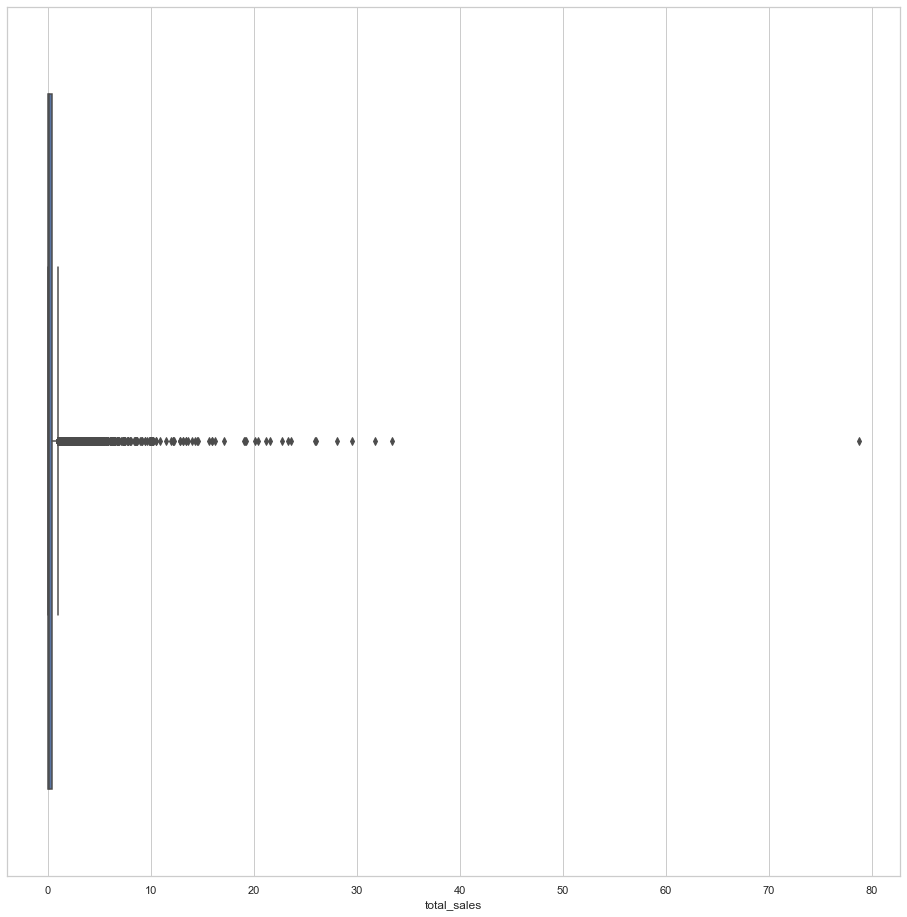

In [22]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df, x='total_sales')

# 5) Узнайте, на какой платформе было выпущено больше всего игр

In [23]:
df.platform.value_counts().sort_values(ascending=False).head(1)

PS2    2161
Name: platform, dtype: int64

## 6) Определите, игр какого жанра больше всего

In [24]:
df.genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

# 7) Найдите игры с наибольшей и наименьшей оценкой от пользователей

In [25]:
df[df['critic_score']!=-1]['critic_score'].sort_values().head(1)

13689    13.0
Name: critic_score, dtype: float64

In [26]:
df[df['critic_score']!=-1]['critic_score'].sort_values(ascending=False).head(1)

227    98.0
Name: critic_score, dtype: float64

# 8)Оцените корреляцию между оценками критиков и пользовательскими оценками

In [27]:
df.user_score.fillna(-1,inplace=True)

In [28]:
x=df[df['critic_score']!=-1]

In [29]:
y=df[df['user_score']!=-1]

In [30]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = x['critic_score']
corr_df['user_score'] = y['user_score']

In [31]:
corr_df.dropna().corr()

critic_score  user_score
critic_score      1.000000    0.580878
user_score        0.580878    1.000000

Коэффициент корреляции равен 0.58 , что говорит нам  о существенной положительной линейной зависимости двух величин

## [4. Составьте портрет пользователя для каждого региона](#stage_4)
Для пользователей каждого региона (Северная Америка, Европа и Японии) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ


In [32]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77          -1.0        -1.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00          -1.0        -1.0    NaN   

   total_sales  
0        78.77  
1        33.43  
2        31.73  
3        29.49  
4        21.16

топ-5 предпочтительных платформ

Text(0.5, 1.0, 'Топ-5 жанров в США')

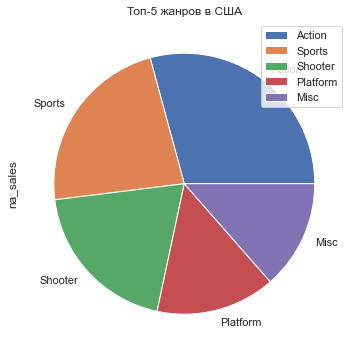

In [33]:
df.groupby('genre').agg({"na_sales":"sum"}).sort_values(by='na_sales',ascending=False).head(5).plot(kind='pie',subplots=True)
plt.title('Топ-5 жанров в США')




Text(0.5, 1.0, 'Топ-5 жанров в Европы')

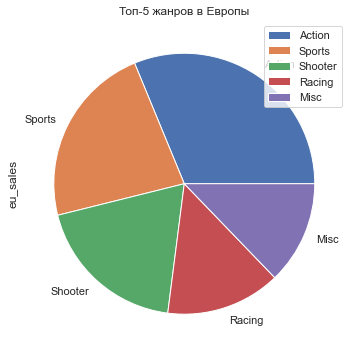

In [34]:
df.groupby('genre').agg({"eu_sales":"sum"}).sort_values(by='eu_sales',ascending=False).head(5).plot(kind='pie',subplots=True)
plt.title('Топ-5 жанров в Европы')

Text(0.5, 1.0, 'Топ-5 жанров в Японии')

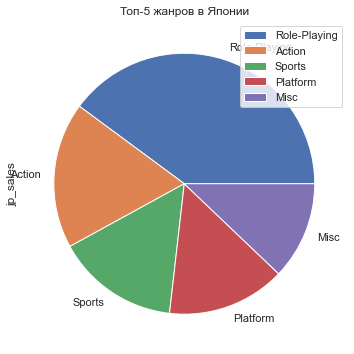

In [35]:
df.groupby('genre').agg({"jp_sales":"sum"}).sort_values(by='jp_sales',ascending=False).head(5).plot(kind='pie',subplots=True)
plt.title('Топ-5 жанров в Японии')

### В какие года пользователи были наиболее активны (больше всего покупали игры)

Text(0.5, 1.0, 'США')

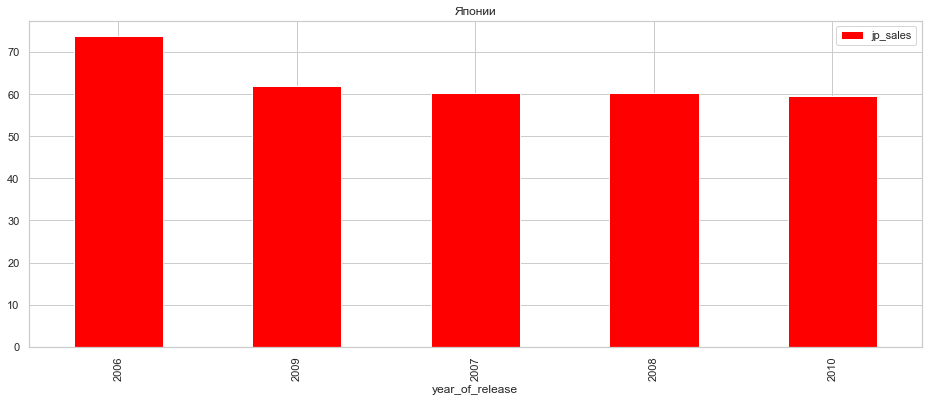

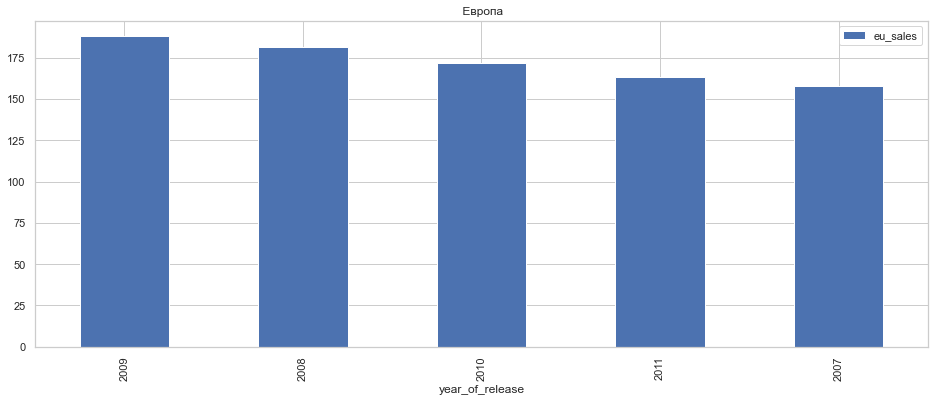

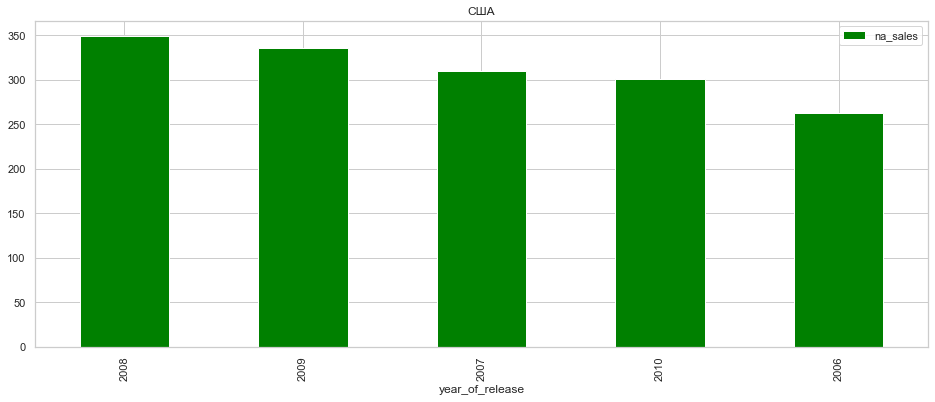

In [36]:
df.groupby('year_of_release').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',color='red')
plt.title('Японии')
df.groupby('year_of_release').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title(' Европа')
df.groupby('year_of_release').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',color='green')
plt.title('США')

### Топ-5 предпочтительных платформ

Text(0.5, 1.0, 'США')

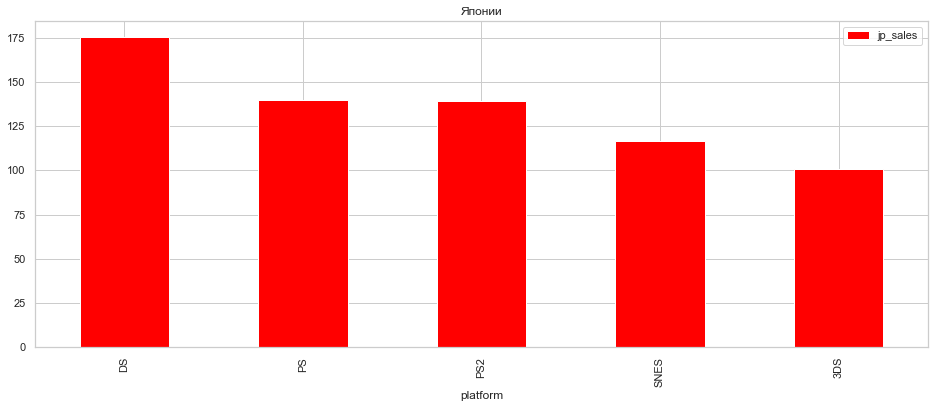

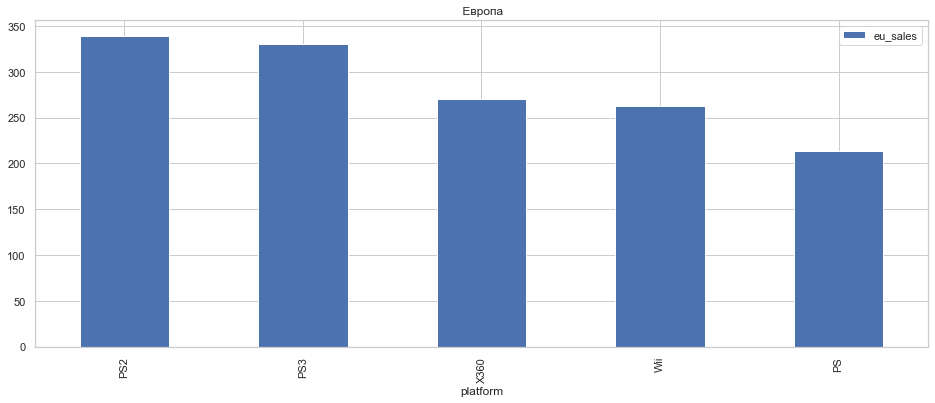

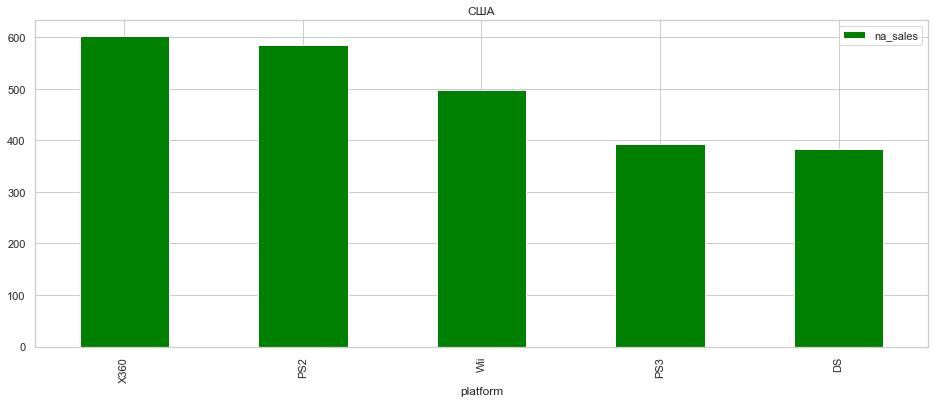

In [37]:

df.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',color='red')
plt.title('Японии')
df.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title(' Европа')
df.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',color='green')
plt.title('США')

## [5. Проверьте гипотезы](#stage_5)
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

1)
- Н0:  - средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- H1: - средний пользовательский рейтинг платформ PS2 и PS3 не одинаковый;


In [43]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77          -1.0        -1.0   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00          -1.0        -1.0   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00          -1.0        -1.0   
16711      0.00      0.01      0.00         0.00          -1.0        -1.0   
16712      0.00      0.00      0.01         0.00          -1.0        -1.0   
16713      0.01      0.00      0.00         0.00          -1.0        -1.0   
16714      0.00      0.00      0.01         0.00          -1.0        -1.0   

      rating  total_sales  
0          E        78.77  
1        NaN        33.43  
2          E        31.73  
3          E        29.49  
4        NaN        21.16  
...      ...          ...  
16710    NaN         0.00  
16711    NaN         0.01  
16712    NaN         0.00  
16713    NaN         0.01  
16714    NaN         0.00  

[16715 rows x 12 columns]

In [60]:
ps2=df.query('platform=="PS2" and user_score>0')['user_score']

In [51]:
ps2.mean()

7.626833199033038

In [52]:
ps3=df.query('platform=="PS3" and user_score>0')['user_score']

In [55]:
ps3.mean()

6.726567844925886

In [56]:
from scipy.stats import ttest_ind

In [57]:
a=ttest_ind(ps2, ps3)


print('t = ', a[0])
print('pvalue = ',a[1])

if a[1]<0.05:
    print('Reject H0')
else:
    print('Not Reject H0')

t =  14.8502067821259
pvalue =  1.5742610791426753e-47
Reject H0


# Делаем вывод, что всё-таки оличается средний пользовательский рейтинг платформ PS2 и PS3. Различия статистически значимы.

2)
- Н0: средний пользовательский рейтинг жанров Action и Sports одинаковый
- Н1: средний пользовательский рейтинг жанров Action и Sports различается

In [68]:
action=df.query('genre=="Action" and user_score>0')['user_score']

In [69]:
action.mean()

7.054043715846988

In [67]:
sports=df.query('genre=="Sports" and user_score>0')['user_score']

In [71]:
sports.mean()

6.961196736174073

In [73]:
b=ttest_ind(sports, action)


print('t = ', b[0])
print('pvalue = ',b[1])

if b[1]<0.05:
    print('Reject H0')
else:
    print('Not Reject H0')

t =  -1.6259419280500857
pvalue =  0.10406951359049141
Not Reject H0


## Проверим гипотезу о том что средняя сумма продаж по всем странам для PS2  и PS3 равна

In [11]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  total_sales  
0          E        78.77  
1        NaN        33.43  
2          E        31.73  
3          E        29.49  
4        NaN        21.16  
...      ...          ...  
16710    NaN         0.00  
16711    NaN         0.01  
16712    NaN         0.00  
16713    NaN         0.01  
16714    NaN         0.00  

[16715 rows x 12 columns]

In [26]:
df_ps2=df.query('platform=="PS2" and total_sales>0').total_sales

In [28]:
df_ps2.mean()

0.6686047904191619

In [29]:
df_ps3=df.query('platform=="PS3" and total_sales>0').total_sales

In [30]:
df_ps3.mean()

0.7848949771689492

Text(0.5, 1.0, 'Распределения')

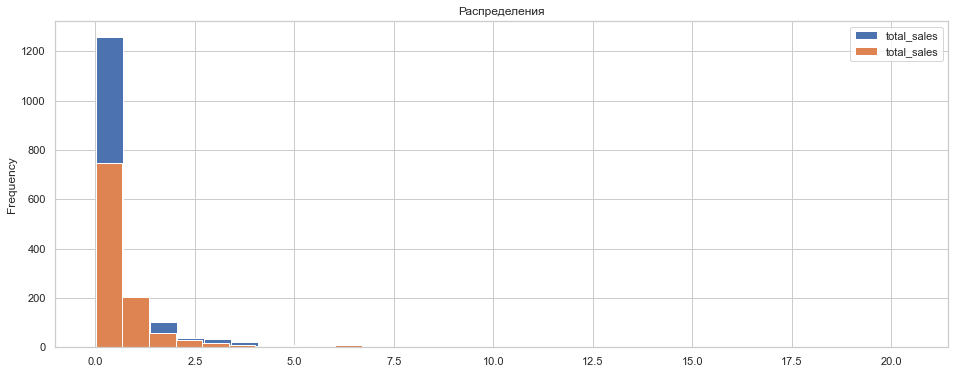

In [47]:
df_ps2.plot(kind='hist', bins=30, grid=True,legend =True)
df_ps3.plot(kind='hist', bins=30, grid=True,legend =True)
plt.title('Распределения')

Text(0.5, 1.0, 'Распеределения log')

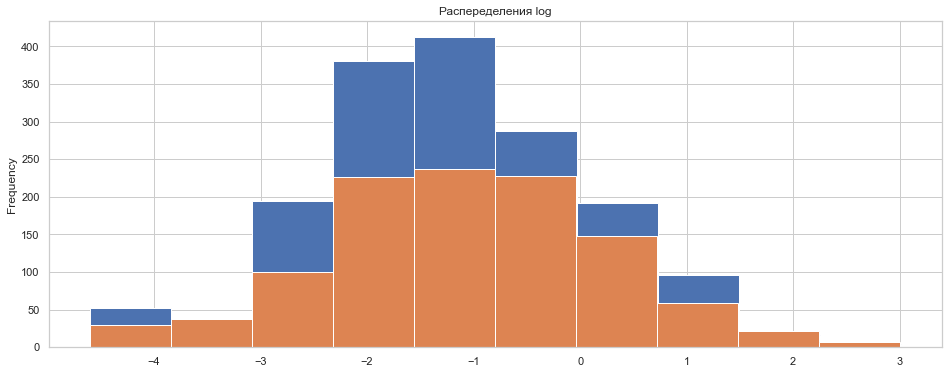

In [48]:
np.log(df_ps2).plot(kind='hist')
np.log(df_ps3).plot(kind='hist')
plt.title('Распеределения log')

In [51]:
import scipy
scipy.stats.shapiro(df_ps2)

ShapiroResult(statistic=0.48304176330566406, pvalue=0.0)

In [52]:
scipy.stats.shapiro(df_ps3)

ShapiroResult(statistic=0.476293683052063, pvalue=0.0)

Оба распределения имеют не нормальные , это видно и по графику распределения и по стат. тесту

In [53]:
scipy.stats.shapiro(np.log(df_ps2))


ShapiroResult(statistic=0.9947150349617004, pvalue=1.2052721103827935e-05)

In [54]:
scipy.stats.shapiro(np.log(df_ps3))

ShapiroResult(statistic=0.9961043000221252, pvalue=0.007346751634031534)

Логарифмированные данные тоже дают не нормальное распределение но близко к нормальному, значит будем использовать непараметрически тест Мана-Уйтни

In [57]:
U=scipy.stats.mannwhitneyu(df_ps2,df_ps3)

In [58]:

print('pvalue = ',U[1])

if U[1]<0.05:
    print('Reject H0')
else:
    print('Not Reject H0')

pvalue =  0.010838345528586183
Reject H0


Мы вынуждены отклонить нулевую гипотезу о равенстве средних сумм продаж по всем странам в df PS2 и PS3

In [67]:
a=df_ps2.mean()
b=df_ps3.mean()
print('Среднее для PS2={}'.format(a))
print('Среднее для PS3={}'.format(b))

Среднее для PS2=0.6686047904191619
Среднее для PS3=0.7848949771689492


Проверим тоже самое для PS3 и набирающую популярность PS4
- H0: средние суммы продаж по старнам равны для PS3 и PS4
- Н1: средние суммы продаж по старнам неравны

In [68]:
df_ps4=df.query('platform=="PS4" and total_sales>0').total_sales

<AxesSubplot:ylabel='Frequency'>

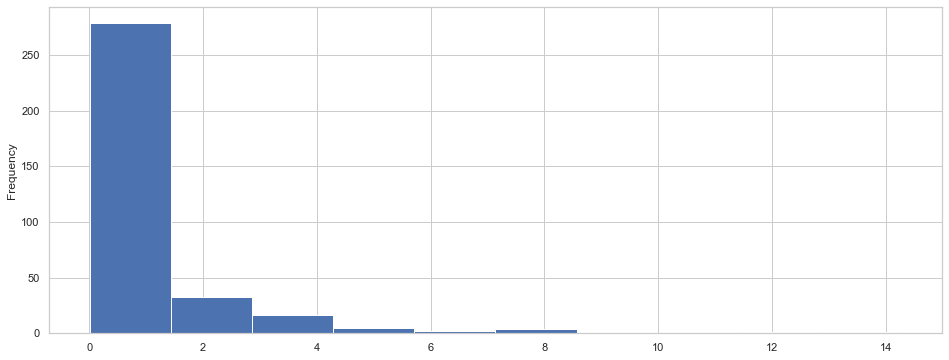

In [70]:
df_ps4.plot(kind='hist')

In [71]:
scipy.stats.shapiro(df_ps4)

ShapiroResult(statistic=0.5399289131164551, pvalue=6.434367638299374e-29)

In [ ]:
Распределение ненормальное

In [72]:
U2=scipy.stats.mannwhitneyu(df_ps3,df_ps4)

In [73]:
print('pvalue = ',U[1])

if U2[1]<0.05:
    print('Reject H0')
else:
    print('Not Reject H0')

pvalue =  0.010838345528586183
Reject H0


In [74]:
a=df_ps3.mean()
b=df_ps4.mean()
print('Среднее для PS3={}'.format(a))
print('Среднее для PS4={}'.format(b))

Среднее для PS3=0.7848949771689492
Среднее для PS4=0.8744281524926676


Мы вынуждены отклонить нулевую гипотезу о равенстве средних сумм продаж по всем странам в df PS3 и PS4

# Делаем вывод, что статистически значимых различий в двух группах нет и разность их средний объясняется случайностью.

# Вывод

Планируя рукламную кампанию на следующий год, стоит уделить особое внимание играм следующих жанров:
1. **Shooter**. По ним наблюдаются самые высокие средние продажи в Северной Америке (0.64 млн копий) и Европе (0.51 млн).
2. **Sports**. Хорошо продаются в Америке (0.46 млн) и Европе (0.36 млн)
3. **Role-Playing**. Высокие средние продажи в Японии (0.22 млн), Америке (0.29 млн и Европе (0.24 млн)

Жанр Action очень популярен среди производителей компьютерных игр. Однако, средние сборы по играм данного жанра не показывают выдающихся результатов.

Касаемо платформ, имеет смысл сосредоточиться на следующих потенциально прибыльных платформах:
1. **PS4**. Находится на взлёте. Популярна во всех регионах.
2. **Xbox One**. На взлёте. Популярна в Америке и Европе.
3. **PS2**.,**PS3**.,**PS4**. - все имеют статистически значимые различия в средних значениях суммы продаж по всем странам
